<a href="https://colab.research.google.com/github/giorginolab/protein_bert/blob/master/ProteinBERT_Toni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ProteinBERT demo

This uses the model and weights provided by

> Brandes N, Ofer D, Peleg Y, Rappoport N, Linial M. ProteinBERT: A universal deep-learning model of protein sequence and function. bioRxiv. 2021 May 25;2021.05.24.445464.  https://www.biorxiv.org/content/10.1101/2021.05.24.445464v1 

Code based on the repository, https://github.com/nadavbra/protein_bert . 

Adapted for Google Colab by Toni Giorgino, www.giorginolab.it .


# Setup

In [1]:
%cd
%pwd
!git clone https://github.com/nadavbra/protein_bert.git
%cd protein_bert
!git submodule init
!git submodule update
!python setup.py install 

/root
Cloning into 'protein_bert'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 118 (delta 61), reused 56 (delta 22), pack-reused 0
Receiving objects: 100% (118/118), 155.56 KiB | 5.98 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/root/protein_bert
Submodule 'proteinbert/shared_utils' (https://github.com/nadavbra/shared_utils.git) registered for path 'proteinbert/shared_utils'
Cloning into '/root/protein_bert/proteinbert/shared_utils'...
Submodule path 'proteinbert/shared_utils': checked out 'dc1c62a1754c51f6d46b7486e4a3e5e62c0570e1'
running install
running bdist_egg
running egg_info
creating protein_bert.egg-info
writing protein_bert.egg-info/PKG-INFO
writing dependency_links to protein_bert.egg-info/dependency_links.txt
writing requirements to protein_bert.egg-info/requires.txt
writing top-level names to protein_bert.egg-info/top_level.txt
writing manifest file 'protein_b

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
!nvidia-smi

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13634628216467548748
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14509932544
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12059640726033116900
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
Wed Jul 14 09:28:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0

In [3]:
# The examples in this notebook use a set of nine benchmarks described in the publication.
# These benchmarks can be downloaded via FTP from: ftp.cs.huji.ac.il/users/nadavb/protein_bert/protein_benchmarks
# Download the benchmarks into a directory on your machine and set the following variable to the path of that directory.
BENCHMARKS_DIR = '/root/protein_benchmarks'
!mkdir /root/protein_benchmarks
!(cd /root/protein_benchmarks; wget -c ftp://ftp.cs.huji.ac.il/users/nadavb/protein_bert/protein_benchmarks/*)

--2021-07-14 09:28:42--  ftp://ftp.cs.huji.ac.il/users/nadavb/protein_bert/protein_benchmarks/*
           => ‘.listing’
Resolving ftp.cs.huji.ac.il (ftp.cs.huji.ac.il)... 132.65.116.17
Connecting to ftp.cs.huji.ac.il (ftp.cs.huji.ac.il)|132.65.116.17|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /users/nadavb/protein_bert/protein_benchmarks ... done.
==> PASV ... done.    ==> LIST ... done.

.listing                [ <=>                ]   2.12K  --.-KB/s    in 0.05s   

2021-07-14 09:28:45 (40.8 KB/s) - ‘.listing’ saved [2170]

Removed ‘.listing’.
--2021-07-14 09:28:45--  ftp://ftp.cs.huji.ac.il/users/nadavb/protein_bert/protein_benchmarks/PhosphositePTM.test.csv
           => ‘PhosphositePTM.test.csv’
==> CWD not required.
==> PASV ... done.    ==> RETR PhosphositePTM.test.csv ... done.
Length: 10368100 (9.9M)

PhosphositePTM.test 100%[===================>]   9.89M  2.86MB/s    in 3.5s    

2021-07-

# Fine-tune the model for the signal peptide benchmark

In [4]:
!mkdir /root/proteinbert_models
!(cd /root/proteinbert_models; wget -c ftp://ftp.cs.huji.ac.il/users/nadavb/protein_bert/epoch_92400_sample_23500000.pkl; \
  cp epoch_92400_sample_23500000.pkl default.pkl )

--2021-07-14 09:29:56--  ftp://ftp.cs.huji.ac.il/users/nadavb/protein_bert/epoch_92400_sample_23500000.pkl
           => ‘epoch_92400_sample_23500000.pkl’
Resolving ftp.cs.huji.ac.il (ftp.cs.huji.ac.il)... 132.65.116.17
Connecting to ftp.cs.huji.ac.il (ftp.cs.huji.ac.il)|132.65.116.17|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /users/nadavb/protein_bert ... done.
==> SIZE epoch_92400_sample_23500000.pkl ... 191800918
==> PASV ... done.    ==> RETR epoch_92400_sample_23500000.pkl ... done.
Length: 191800918 (183M) (unauthoritative)

epoch_92400_sample_ 100%[===================>] 182.92M  4.41MB/s    in 43s     

2021-07-14 09:30:42 (4.25 MB/s) - ‘epoch_92400_sample_23500000.pkl’ saved [191800918]



In [5]:
import os

import pandas as pd
from IPython.display import display

from tensorflow import keras

from sklearn.model_selection import train_test_split

from proteinbert import OutputType, OutputSpec, FinetuningModelGenerator, load_pretrained_model, finetune, evaluate_by_len
from proteinbert.conv_and_global_attention_model import get_model_with_hidden_layers_as_outputs

BENCHMARK_NAME = 'signalP_binary'

# A local (non-global) bianry output
OUTPUT_TYPE = OutputType(False, 'binary')
UNIQUE_LABELS = [0, 1]
OUTPUT_SPEC = OutputSpec(OUTPUT_TYPE, UNIQUE_LABELS)


# Loading the dataset

train_set_file_path = os.path.join(BENCHMARKS_DIR, '%s.train.csv' % BENCHMARK_NAME)
train_set = pd.read_csv(train_set_file_path).dropna().drop_duplicates()
train_set, valid_set = train_test_split(train_set, stratify = train_set['label'], 
                                        test_size = 0.1, random_state = 0)

test_set_file_path = os.path.join(BENCHMARKS_DIR, '%s.test.csv' % BENCHMARK_NAME)
test_set = pd.read_csv(test_set_file_path).dropna().drop_duplicates()

print(f'{len(train_set)} training set records, {len(valid_set)} validation set records, {len(test_set)} test set records.')


# Loading the pre-trained model and fine-tuning it on the loaded dataset

pretrained_model_generator, input_encoder = load_pretrained_model()

# get_model_with_hidden_layers_as_outputs gives the model output access to the hidden layers (on top of the output)
model_generator = FinetuningModelGenerator(pretrained_model_generator, OUTPUT_SPEC, 
                                           pretraining_model_manipulation_function = \
        get_model_with_hidden_layers_as_outputs, dropout_rate = 0.5)

training_callbacks = [
    keras.callbacks.ReduceLROnPlateau(patience = 1, factor = 0.25, min_lr = 1e-05, verbose = 1),
    keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True),
]

finetune(model_generator, input_encoder, OUTPUT_SPEC, train_set['seq'], train_set['label'], valid_set['seq'], valid_set['label'], \
        seq_len = 512, batch_size = 32, max_epochs_per_stage = 40, lr = 1e-04, begin_with_frozen_pretrained_layers = True, \
        lr_with_frozen_pretrained_layers = 1e-02, n_final_epochs = 1, final_seq_len = 1024, final_lr = 1e-05, callbacks = training_callbacks)


# Evaluating the performance on the test-set

results, confusion_matrix = evaluate_by_len(model_generator, input_encoder, OUTPUT_SPEC, test_set['seq'], test_set['label'], \
        start_seq_len = 512, start_batch_size = 32)

print('Test-set performance:')
display(results)

print('Confusion matrix:')
display(confusion_matrix)

14945 training set records, 1661 validation set records, 4152 test set records.
[2021_07_14-09:30:44] Training set: Filtered out 0 of 14945 (0.0%) records of lengths exceeding 510.
[2021_07_14-09:30:45] Validation set: Filtered out 0 of 1661 (0.0%) records of lengths exceeding 510.
[2021_07_14-09:30:45] Training with frozen pretrained layers...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40
468/468 [==============================] - 71s 73ms/step - loss: 0.0943 - val_loss: 0.0747
Epoch 2/40
468/468 [==============================] - 32s 69ms/step - loss: 0.0753 - val_loss: 0.0711
Epoch 3/40
468/468 [==============================] - 33s 70ms/step - loss: 0.0722 - val_loss: 0.0625
Epoch 4/40
468/468 [==============================] - 33s 70ms/step - loss: 0.0763 - val_loss: 0.0867

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 5/40
468/468 [==============================] - 33s 70ms/step - loss: 0.0647 - val_loss: 0.0628

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
[2021_07_14-09:34:10] Training the entire fine-tuned model...
[2021_07_14-09:34:20] Incompatible number of optimizer weights - will not initialize them.
Epoch 1/40
468/468 [==============================] - 91s 182ms/step - loss: 0.0677 - val_loss: 0.0714
Epoch 2/40
468/468 [==============================] - 83s 178ms/step - l

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


935/935 [==============================] - 176s 182ms/step - loss: 0.0245 - val_loss: 0.0536


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Test-set performance:


,# records,AUC
Model seq len,,
512,4152,0.996027
All,4152,0.996027


Confusion matrix:


,0,1
0,3447,31
1,31,643


# Run all benchmarks

Do not run - takes too much time.

In [6]:
import os

import pandas as pd
from IPython.display import display

from tensorflow import keras

from sklearn.model_selection import train_test_split

from proteinbert import OutputType, OutputSpec, FinetuningModelGenerator, load_pretrained_model, finetune, evaluate_by_len, log
from proteinbert.conv_and_global_attention_model import get_model_with_hidden_layers_as_outputs

BENCHMARKS = [
    # name, output_type
    ('signalP_binary', OutputType(False, 'binary')),
    ('fluorescence', OutputType(False, 'numeric')),
    ('remote_homology', OutputType(False, 'categorical')),
    ('stability', OutputType(False, 'numeric')),
    ('scop', OutputType(False, 'categorical')),
    ('secondary_structure', OutputType(True, 'categorical')),
    ('disorder_secondary_structure', OutputType(True, 'binary')),
    ('ProFET_NP_SP_Cleaved', OutputType(False, 'binary')),
    ('PhosphositePTM', OutputType(True, 'binary')),
]

settings = {
    'max_dataset_size': None,
    'max_epochs_per_stage': 40,
    'seq_len': 512,
    'batch_size': 32,
    'final_epoch_seq_len': 1024,
    'initial_lr_with_frozen_pretrained_layers': 1e-02,
    'initial_lr_with_all_layers': 1e-04,
    'final_epoch_lr': 1e-05,
    'dropout_rate': 0.5,
    'training_callbacks': [
        keras.callbacks.ReduceLROnPlateau(patience = 1, factor = 0.25, min_lr = 1e-05, verbose = 1),
        keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True),
    ],
}

####### Uncomment for debug mode
# settings['max_dataset_size'] = 500
# settings['max_epochs_per_stage'] = 1

def run_benchmark(benchmark_name, pretraining_model_generator, input_encoder, pretraining_model_manipulation_function = None):
    
    log('========== %s ==========' % benchmark_name)  
    
    output_type = get_benchmark_output_type(benchmark_name)
    log('Output type: %s' % output_type)
    
    train_set, valid_set, test_set = load_benchmark_dataset(benchmark_name)        
    log(f'{len(train_set)} training set records, {len(valid_set)} validation set records, {len(test_set)} test set records.')
    
    if settings['max_dataset_size'] is not None:
        log('Limiting the training, validation and test sets to %d records each.' % settings['max_dataset_size'])
        train_set = train_set.sample(min(settings['max_dataset_size'], len(train_set)), random_state = 0)
        valid_set = valid_set.sample(min(settings['max_dataset_size'], len(valid_set)), random_state = 0)
        test_set = test_set.sample(min(settings['max_dataset_size'], len(test_set)), random_state = 0)
    
    if output_type.is_seq or output_type.is_categorical:
        train_set['label'] = train_set['label'].astype(str)
        valid_set['label'] = valid_set['label'].astype(str)
        test_set['label'] = test_set['label'].astype(str)
    else:
        train_set['label'] = train_set['label'].astype(float)
        valid_set['label'] = valid_set['label'].astype(float)
        test_set['label'] = test_set['label'].astype(float)
        
    if output_type.is_categorical:
        
        if output_type.is_seq:
            unique_labels = sorted(set.union(*train_set['label'].apply(set)) | set.union(*valid_set['label'].apply(set)) | \
                    set.union(*test_set['label'].apply(set)))
        else:
            unique_labels = sorted(set(train_set['label'].unique()) | set(valid_set['label'].unique()) | set(test_set['label'].unique()))
            
        log('%d unique lebels.' % len(unique_labels))
    elif output_type.is_binary:
        unique_labels = [0, 1]
    else:
        unique_labels = None
        
    output_spec = OutputSpec(output_type, unique_labels)
    model_generator = FinetuningModelGenerator(pretraining_model_generator, output_spec, pretraining_model_manipulation_function = \
            pretraining_model_manipulation_function, dropout_rate = settings['dropout_rate'])
    finetune(model_generator, input_encoder, output_spec, train_set['seq'], train_set['label'], valid_set['seq'], valid_set['label'], \
            seq_len = settings['seq_len'], batch_size = settings['batch_size'], max_epochs_per_stage = settings['max_epochs_per_stage'], \
            lr = settings['initial_lr_with_all_layers'], begin_with_frozen_pretrained_layers = True, lr_with_frozen_pretrained_layers = \
            settings['initial_lr_with_frozen_pretrained_layers'], n_final_epochs = 1, final_seq_len = settings['final_epoch_seq_len'], \
            final_lr = settings['final_epoch_lr'], callbacks = settings['training_callbacks'])
    
    for dataset_name, dataset in [('Training-set', train_set), ('Validation-set', valid_set), ('Test-set', test_set)]:
        
        log('*** %s performance: ***' % dataset_name)
        results, confusion_matrix = evaluate_by_len(model_generator, input_encoder, output_spec, dataset['seq'], dataset['label'], \
                start_seq_len = settings['seq_len'], start_batch_size = settings['batch_size'])
    
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(results)
        
        if confusion_matrix is not None:
            with pd.option_context('display.max_rows', 16, 'display.max_columns', 10):
                log('Confusion matrix:')
                display(confusion_matrix)
                
    return model_generator

def load_benchmark_dataset(benchmark_name):
    
    train_set_file_path = os.path.join(BENCHMARKS_DIR, '%s.train.csv' % benchmark_name)
    valid_set_file_path = os.path.join(BENCHMARKS_DIR, '%s.valid.csv' % benchmark_name)
    test_set_file_path = os.path.join(BENCHMARKS_DIR, '%s.test.csv' % benchmark_name)
    
    train_set = pd.read_csv(train_set_file_path).dropna().drop_duplicates()
    test_set = pd.read_csv(test_set_file_path).dropna().drop_duplicates()
          
    if os.path.exists(valid_set_file_path):
        valid_set = pd.read_csv(valid_set_file_path).dropna().drop_duplicates()
    else:
        log(f'Validation set {valid_set_file_path} missing. Splitting training set instead.')
        train_set, valid_set = train_test_split(train_set, stratify = train_set['label'], test_size = 0.1, random_state = 0)
    
    return train_set, valid_set, test_set

def get_benchmark_output_type(benchmark_name):
    for name, output_type in BENCHMARKS:
        if name == benchmark_name:
            return output_type
        
pretrained_model_generator, input_encoder = load_pretrained_model()

for benchmark_name, _ in BENCHMARKS:
    # run_benchmark(benchmark_name, pretrained_model_generator, input_encoder, 
    #              pretraining_model_manipulation_function = get_model_with_hidden_layers_as_outputs)
    print("Skipping - uncomment if you are sure")
        
log('Done.')

Skipping - uncomment if you are sure
Skipping - uncomment if you are sure
Skipping - uncomment if you are sure
Skipping - uncomment if you are sure
Skipping - uncomment if you are sure
Skipping - uncomment if you are sure
Skipping - uncomment if you are sure
Skipping - uncomment if you are sure
Skipping - uncomment if you are sure
[2021_07_14-09:47:41] Done.


# Predict an arbitrary sequence

In [31]:
my_sequence = "AAAAA"
my_seq_len = 512
my_sequence_encoded = input_encoder.encode_X([my_sequence],my_seq_len)

finetuned_model = model_generator.create_model(my_seq_len)
finetuned_model.predict(my_sequence_encoded)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


array([[0.00042532]], dtype=float32)

In [32]:
my_sequence_encoded

[array([[23,  0,  0,  0,  0,  0, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25

# Visualizing the attention layers

You can run this only after you have fine-tuned the model on a benchmark (e.g. signal peptide) and obtained *model_generator*.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


MLGMIRNSLFGSVETWPWQVLSTGGKEDVSYEERACEGGKFATVEVTDKPVDEALREAMPKIMKYVGGTN 0


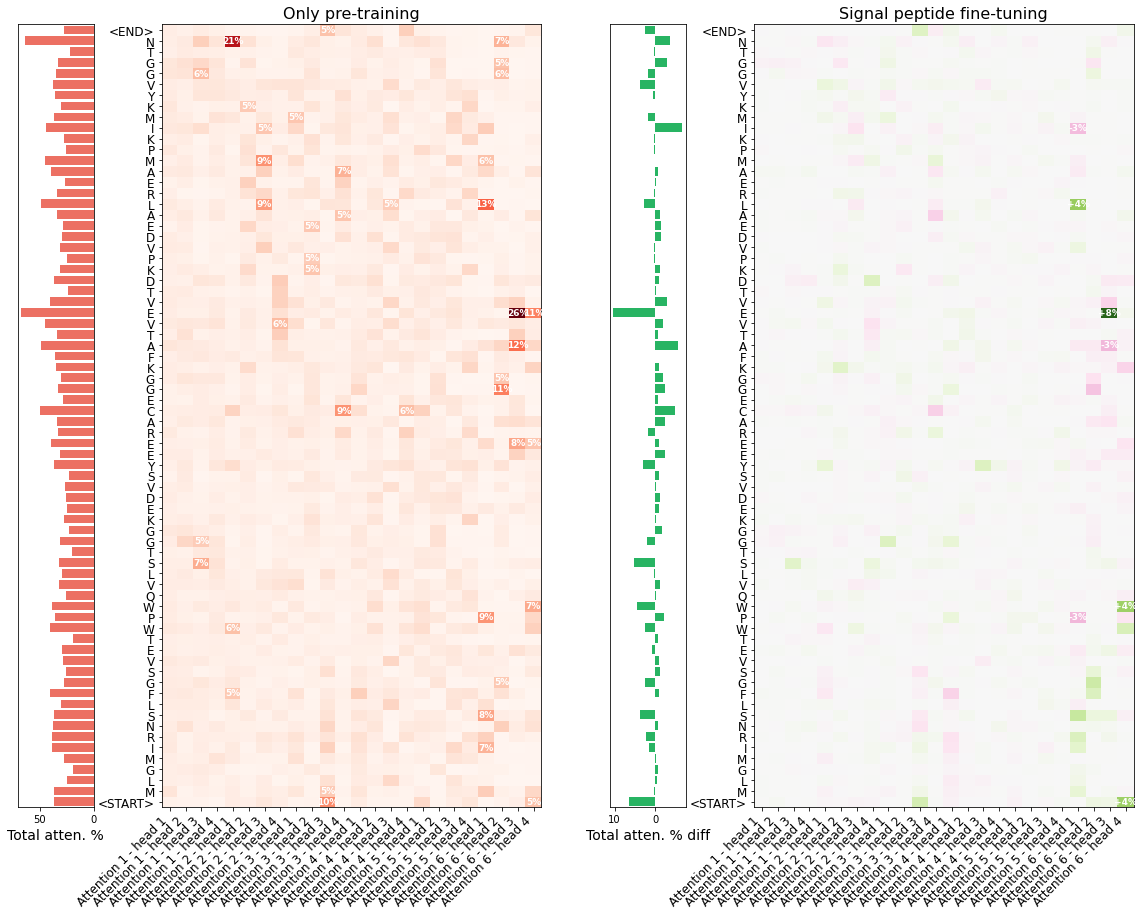

In [16]:
import numpy as np
import matplotlib.pyplot as plt

BENCHMARK_DISPLAY_NAME = 'Signal peptide'

TEST_SET_FILE_PATH = '/root/protein_benchmarks/signalP_binary.train.csv'
IDEAL_LEN = 80

def calculate_attentions(model, input_encoder, seq, seq_len = None):
    
    from tensorflow.keras import backend as K
    from proteinbert.tokenization import index_to_token
    
    if seq_len is None:
        seq_len = len(seq) + 2
    
    X = input_encoder.encode_X([seq], seq_len)
    (X_seq,), _ = X
    seq_tokens = list(map(index_to_token.get, X_seq))

    model_inputs = [layer.input for layer in model.layers if 'InputLayer' in str(type(layer))][::-1]
    model_attentions = [layer.calculate_attention(layer.input) for layer in model.layers if 'GlobalAttention' in str(type(layer))]
    invoke_model_attentions = K.function(model_inputs, model_attentions)
    attention_values = invoke_model_attentions(X)
    
    attention_labels = []
    merged_attention_values = []

    for attention_layer_index, attention_layer_values in enumerate(attention_values):
        for head_index, head_values in enumerate(attention_layer_values):
            attention_labels.append('Attention %d - head %d' % (attention_layer_index + 1, head_index + 1))
            merged_attention_values.append(head_values)

    attention_values = np.array(merged_attention_values)
    
    return attention_values, seq_tokens, attention_labels

def plot_attention(attention_values, seq_tokens, attention_labels, ax, cmap = 'Reds', vmin = 0, vmax = None, text_value_threshold = 0.1):

    heatmap = ax.pcolor(attention_values.transpose(), cmap = cmap, vmin = vmin, vmax = vmax)

    ax.set_xticks(np.arange(len(attention_labels)) + 0.5)
    ax.set_xticklabels(attention_labels, rotation = 45, ha = 'right', fontsize = 12)
    ax.set_yticks(np.arange(len(seq_tokens)) + 0.5)
    ax.set_yticklabels(seq_tokens, fontsize = 12)

    for i, row in enumerate(attention_values):
        for j, value in enumerate(row):
            if abs(value) >= text_value_threshold:
                add_plus_sign = attention_values.min() < 0 and value > 0
                plus_sign = '+' if add_plus_sign else ''
                ax.text(i + 0.5, j + 0.5, plus_sign + '%d%%' % (100 * value), color = 'white', ha = 'center', va = 'center', \
                        fontsize = 9, fontweight = 'bold', fontstretch = 'condensed')
                
test_set = pd.read_csv(TEST_SET_FILE_PATH)
chosen_index = ((test_set['seq'].str.len() - IDEAL_LEN).abs()).sort_values().index[0]
seq = test_set.loc[chosen_index, 'seq']
label = test_set.loc[chosen_index, 'label']
                
seq_len = len(seq) + 2

pretrained_model_generator, input_encoder = load_pretrained_model()
pretrained_model = pretrained_model_generator.create_model(seq_len)
pretrained_attention_values, pretrained_seq_tokens, pretrained_attention_labels = calculate_attentions(pretrained_model, input_encoder, seq, \
        seq_len = seq_len)

finetuned_model = model_generator.create_model(seq_len)
finetuned_attention_values, finetuned_seq_tokens, finetuned_attention_labels = calculate_attentions(finetuned_model, input_encoder, seq, \
        seq_len = seq_len)
assert finetuned_seq_tokens == pretrained_seq_tokens
assert finetuned_attention_labels == pretrained_attention_labels[:len(finetuned_attention_labels)]

fig, axes = plt.subplots(ncols = 4, figsize = (20, 0.2 * seq_len), gridspec_kw = dict(width_ratios = [1, 5, 1, 5]))
fig.subplots_adjust(wspace = 0.3)

axes[0].barh(np.arange(seq_len), 100 * pretrained_attention_values.sum(axis = 0), color = '#EC7063')
axes[0].set_ylim((-0.5, seq_len - 0.5))
axes[0].set_yticks([])
axes[0].invert_xaxis()
axes[0].set_xlabel('Total atten. %', fontsize = 14)

vmax = pretrained_attention_values.max()
plot_attention(pretrained_attention_values, pretrained_seq_tokens, pretrained_attention_labels, axes[1], cmap = 'Reds', vmax = vmax, \
        text_value_threshold = 0.05)
axes[1].set_title('Only pre-training', fontsize = 16)

axes[2].barh(np.arange(seq_len), 100 * (finetuned_attention_values - pretrained_attention_values).sum(axis = 0), color = '#28B463')
axes[2].set_ylim((-0.5, seq_len - 0.5))
axes[2].set_yticks([])
axes[2].invert_xaxis()
axes[2].set_xlabel('Total atten. % diff', fontsize = 14)

attention_diff = finetuned_attention_values - pretrained_attention_values[:len(finetuned_attention_labels), :]
vmax = np.abs(attention_diff).max()
plot_attention(attention_diff, finetuned_seq_tokens, finetuned_attention_labels, axes[3], cmap = 'PiYG', vmin = -vmax, vmax = vmax, \
        text_value_threshold = 0.03)
axes[3].set_title('%s fine-tuning' % BENCHMARK_DISPLAY_NAME, fontsize = 16)

print(seq, label)

In [18]:
finetuned_model.save("finetuned")
finetuned_model.save_weights("finetuned_weights")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: finetuned/assets


INFO:tensorflow:Assets written to: finetuned/assets


In [19]:
%ls -l 

total 62568
drwxr-xr-x 2 root root     4096 Jul 14 09:28  bin/
drwxr-xr-x 5 root root     4096 Jul 14 09:28  build/
-rw-r--r-- 1 root root       91 Jul 14 10:12  checkpoint
drwxr-xr-x 2 root root     4096 Jul 14 09:28  dist/
drwxr-xr-x 4 root root     4096 Jul 14 10:12  finetuned/
-rw-r--r-- 1 root root 63994839 Jul 14 10:12  finetuned_weights.data-00000-of-00001
-rw-r--r-- 1 root root     9163 Jul 14 10:12  finetuned_weights.index
drwxr-xr-x 4 root root     4096 Jul 14 09:30  proteinbert/
-rw-r--r-- 1 root root    18446 Jul 14 09:28 'ProteinBERT demo.ipynb'
drwxr-xr-x 2 root root     4096 Jul 14 09:28  protein_bert.egg-info/
-rw-r--r-- 1 root root     7624 Jul 14 09:28  README.rst
-rw-r--r-- 1 root root      711 Jul 14 09:28  setup.py
